In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = './img.jpg'

In [3]:
def show_pic(image, convert=False, name='image', cmap=None, figsize=(5, 5)):
    if convert:
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if image.ndim < 3 and cmap is None:
        cmap='gray'
    plt.figure(figsize=figsize)
    plt.title(name)
    plt.imshow(image, cmap=cmap)

## LABA1

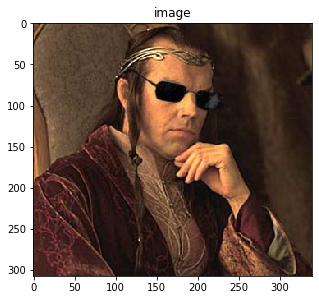

In [4]:
image = cv.imread(IMAGE_PATH)
show_pic(image, 1)

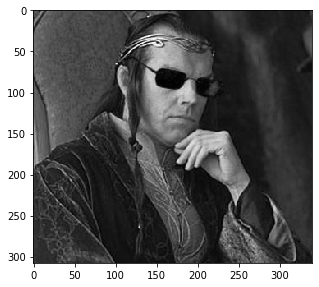

In [6]:
image_g = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show_pic(image_g)

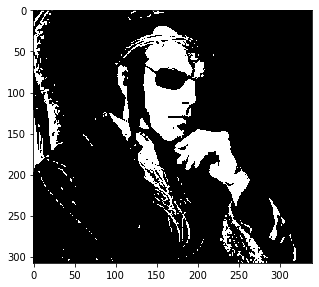

In [10]:
ret, thresholds = cv.threshold(image_g, 100, 255, cv.THRESH_BINARY)
show_pic(thresholds)

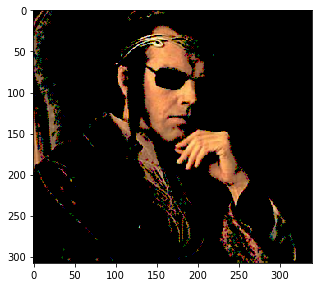

In [12]:
result = cv.bitwise_and(image, cv.cvtColor(thresholds, cv.COLOR_BAYER_GR2BGR))
show_pic(result, 1)

## LABA2

http://robocraft.ru/page/opencv/

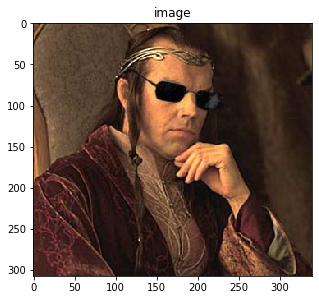

In [141]:
image = cv.imread(IMAGE_PATH)
show_pic(image, 1)
height, width, depth = image.shape
img = cv.resize(image, (height//3, width//3))

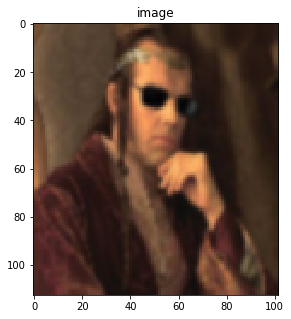

In [142]:
# 1. сглаж по гаусу
ksize = (5, 5)
sigmaX = 0.85
gblur = cv.GaussianBlur(img, ksize, sigmaX)
show_pic(gblur, 1)

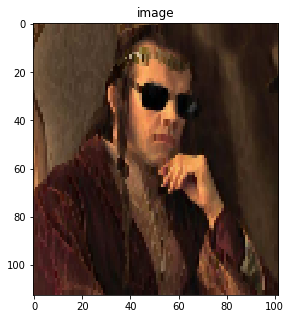

In [143]:
# 2. Морфолог размытие
kernel = cv.getGaussianKernel(ksize=3, sigma=0.5)
morph1 = cv.erode(img, kernel)
show_pic(morph1, 1)

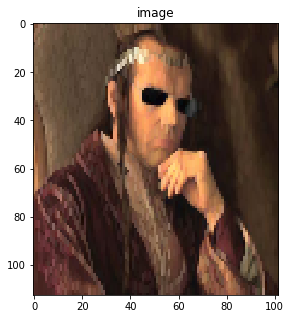

In [144]:
# 3. морфолог расширение
kernel = cv.getGaussianKernel(ksize=3, sigma=0.5)
morph2 = cv.dilate(img, kernel, iterations=1)
show_pic(morph2, 1)

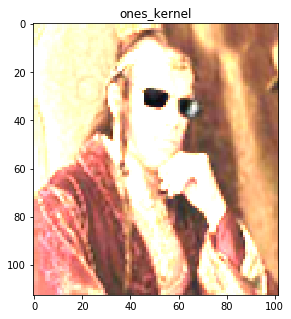

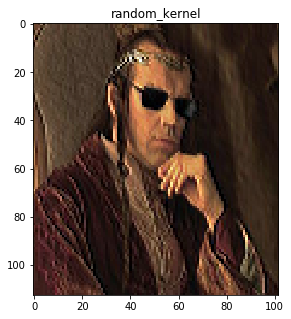

In [145]:
# 4. Собственное ядро
kernel = lambda size: np.ones((size, size), np.uint8)
custom = cv.filter2D(img, -1, kernel(2))
show_pic(custom, 1, 'ones_kernel')

kernel = lambda size: np.random.random_sample((size, size))*(-2.)+1.
custom = cv.filter2D(img, -1, kernel(2))
show_pic(custom, 1, 'random_kernel')

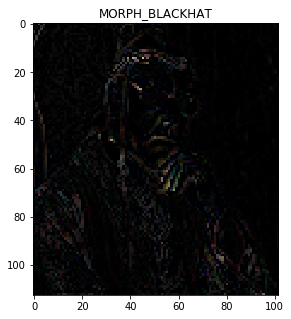

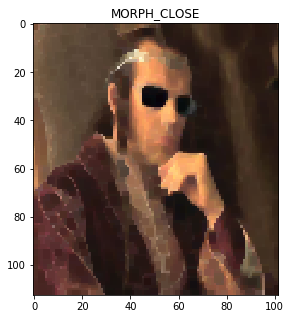

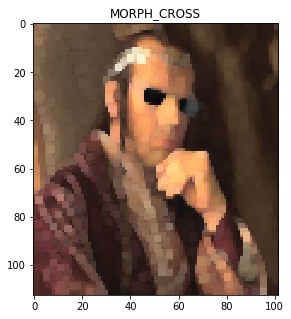

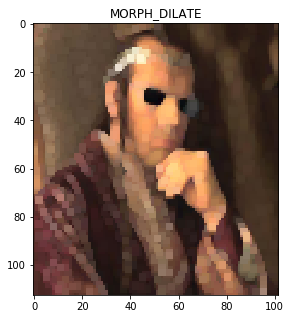

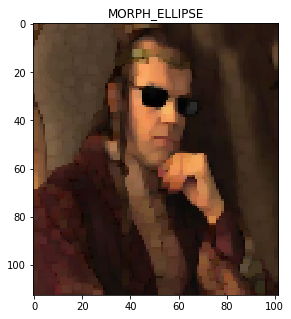

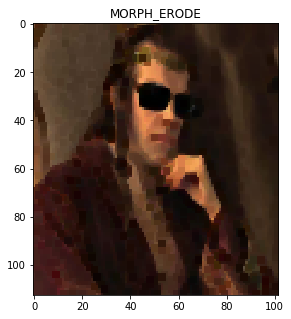

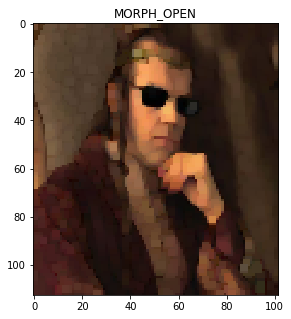

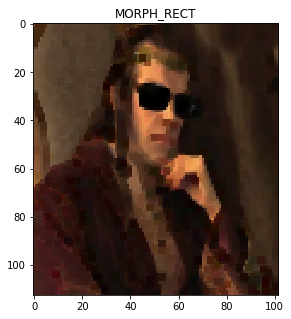

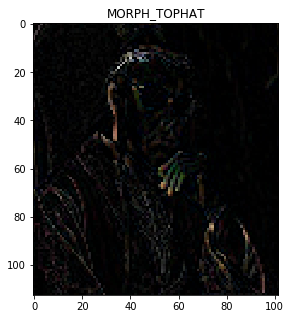

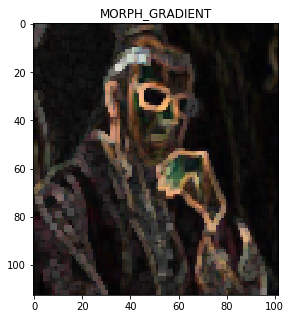

In [146]:
# 5. Морф. функция morphology
kernel = lambda size: np.ones((size, size), np.uint8)
MORPH = {
    'MORPH_BLACKHAT': cv.MORPH_BLACKHAT,
    'MORPH_CLOSE': cv.MORPH_CLOSE,
    'MORPH_CROSS': cv.MORPH_CROSS,
    'MORPH_DILATE': cv.MORPH_DILATE,
    'MORPH_ELLIPSE': cv.MORPH_ELLIPSE,
    'MORPH_ERODE': cv.MORPH_ERODE,
    'MORPH_OPEN': cv.MORPH_OPEN,
    'MORPH_RECT': cv.MORPH_RECT,
    'MORPH_TOPHAT': cv.MORPH_TOPHAT,
    'MORPH_GRADIENT': cv.MORPH_GRADIENT,
}
for name, morph in MORPH.items():
    morph5 = cv.morphologyEx(img, morph, kernel(3))
    show_pic(morph5, 1, name)

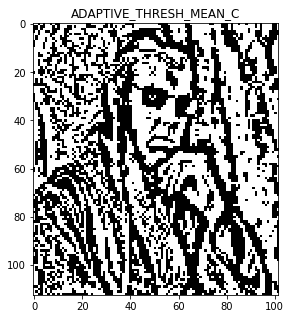

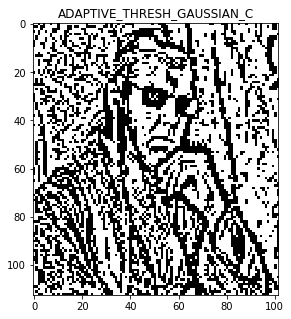

In [148]:
# 6. Пороговые адаптивные преобразования
kernel = lambda size: np.ones((size, size), np.uint8)
THRESH = {
    'ADAPTIVE_THRESH_MEAN_C': cv.ADAPTIVE_THRESH_MEAN_C,
    'ADAPTIVE_THRESH_GAUSSIAN_C': cv.ADAPTIVE_THRESH_GAUSSIAN_C,
}
bw_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
for name, t in THRESH.items():
    thresh = cv.adaptiveThreshold(bw_img, 255, t, cv.THRESH_BINARY, 7, 2)
    show_pic(thresh, 1, name)

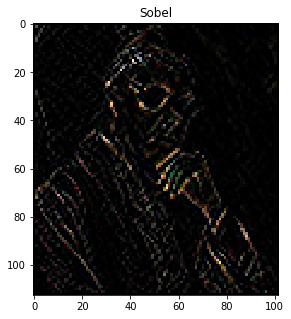

In [149]:
# 7. Оператор Собеля
dx, dy = 1, 1
sobel = cv.Sobel(img, -1, dx, dy)
show_pic(sobel, 1, 'Sobel')

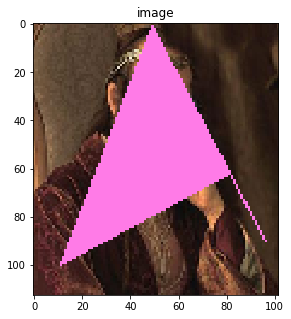

In [150]:
# 8. Заливка (или заменить др морф функц, например поиск светлых зон)
boundary = np.array([np.random.randint(0, min(img.shape[:2]), (4,2))], dtype=np.int32)
# boundary = np.array([[[10, 10], [100,10], [100,100], [10, 100]]], dtype=np.int32)
color = np.random.randint(0, 255, 3)
fill = img.copy()
cv.fillPoly(fill, boundary, (231, 123, 324))
show_pic(fill, 1)

In [152]:
gblur.shape, morph1.shape, morph2.shape, morph5.shape, thresh.shape, sobel.shape, fill.shape, img.shape

((113, 102, 3),
 (113, 102, 3),
 (113, 102, 3),
 (113, 102, 3),
 (113, 102),
 (113, 102, 3),
 (113, 102, 3),
 (113, 102, 3))

In [ ]:
thresh = cv.cvtColor(thresh, cv.COLOR_GRAY2BGR)

In [156]:
line1 = np.concatenate((gblur, morph1, morph2), 1)
line2 = np.concatenate((fill, img, custom), 1)
line3 = np.concatenate((sobel, thresh, morph5), 1)
result = np.concatenate((line1, line2, line3))

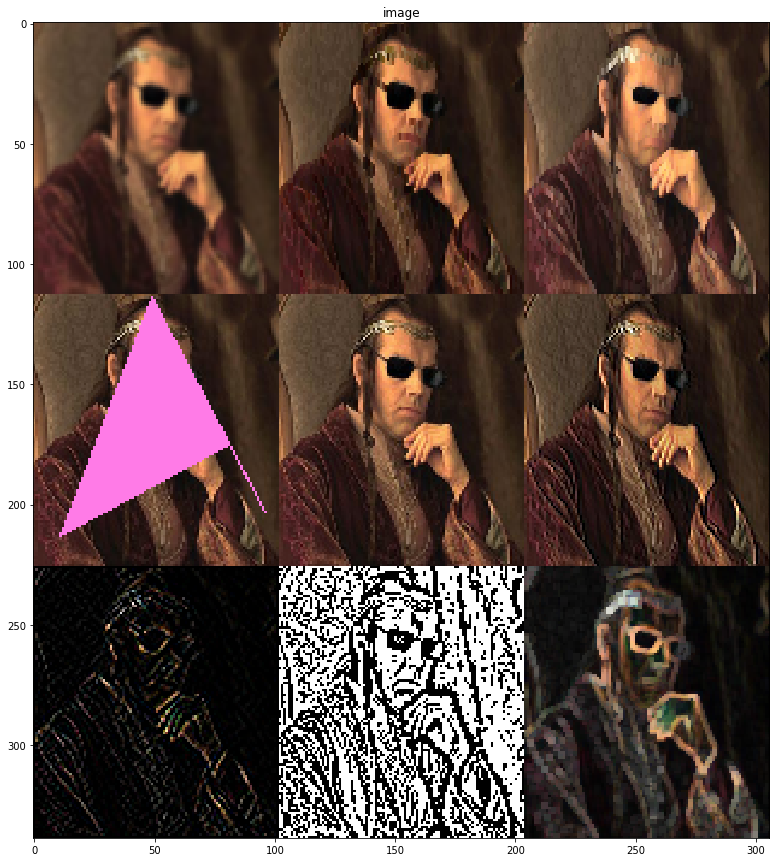

In [157]:
show_pic(result, 1, figsize=(15,15))

# LABA 3

Трансформация изображения
1. Изучить документацию по функциям: cvWarpAffine, cvGetAffineTransform, cv2DRotationMatrix, cvPerspectiveTransform, cvWarpPerspective и cvGetPerspectiveTransform. А также изучите доку-ментацию по функциям cvRemap, cvTransform, cvGetQuadrangleSubPix.
2. Подготовьте изображения.
3. Подготовьте два массива по три точки CvPoint2D32f, один для исходно изображения другой для результирующего изображения.
4. Создайте данные для матриц трансформации: аффинной трансформации и поворота.
5. Заполните массивы. Для первого массива укажите крайние точки изображения: верхнюю левую, верхнюю правую и нижнюю левую. Для второго массива укажите соответствующие точки, но с координатами искомого изображения. После чего получите матрицу аффинной трансформации с помощью cvGetAffineTransform. Выполните трансформацию и преобразуйте изображение к новым координатам.
6. Создайте данные для матрицы поворота: точка оси поворота, угол поворота и масштабирование. Получите матрицу для поворота с помощью cv2DRotationMatrix и выполните трансформацию.
7. Выведите полученные результаты.
8. Подготовьте два аналогичных массива точек для перспективной транс-формации, но уже состоящих из 4 пар точек, и заполните их. Для первого массива крайние точки изображения, а для второго новые координаты этих точек.
9. Получите матрицу преобразования с помощью функции cvGetPerspectiveTransform и выполните перспективное преобразование, после чего покажите результат.

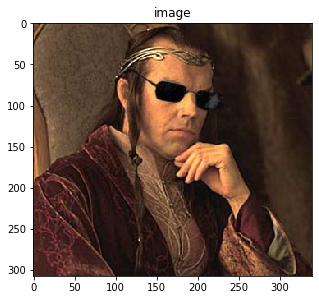

In [7]:
image = cv.imread(IMAGE_PATH)
show_pic(image, 1)
img = image.copy()
rows, cols, ch = image.shape

In [ ]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3f0e3e1e50>,
 Text(0.5, 1.0, 'Output'))

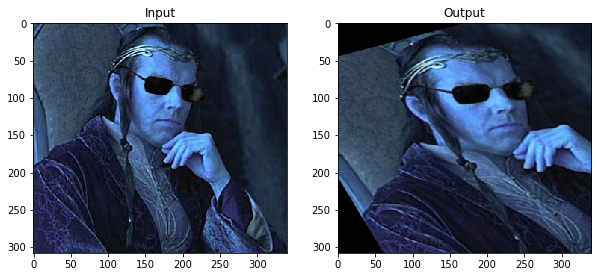

In [12]:
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img, M, (cols,rows))
plt.figure(figsize=(10,20))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3f0ed7bf50>,
 Text(0.5, 1.0, 'Output'))

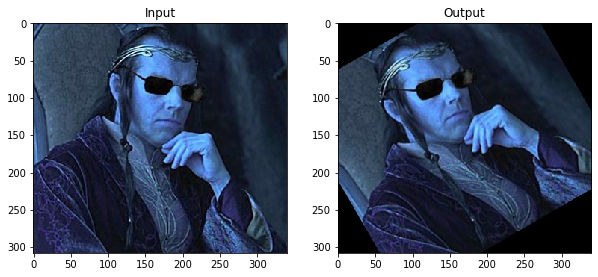

In [11]:
M = cv.getRotationMatrix2D(((rows-1)//2, (cols-1)//2), 30, 1)
dst = cv.warpAffine(img, M, (cols,rows))
plt.figure(figsize=(10,20))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')